## Imports

In [1]:
import pandas as pd
import json
import os
from pprint import pprint
from ftfy import ftfy
import datetime
import time
import matplotlib.pyplot as plt
%matplotlib inline

# BATCH DATA

### Read in SFPD Crime Data

In [2]:
police = pd.read_csv('data/SFPD_Incidents_-_from_1_January_2003.csv')

In [3]:
police.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,160117098,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Monday,02/08/2016,23:55,CENTRAL,"ARREST, BOOKED",PINE ST / MONTGOMERY ST,-122.402574,37.791898,"(37.7918981438883, -122.402573952339)",1.601171e+13
1,160117098,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Monday,02/08/2016,23:55,CENTRAL,"ARREST, BOOKED",PINE ST / MONTGOMERY ST,-122.402574,37.791898,"(37.7918981438883, -122.402573952339)",1.601171e+13
2,160117010,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,02/08/2016,23:50,MISSION,"ARREST, BOOKED",20TH ST / CHURCH ST,-122.428052,37.758090,"(37.7580899767786, -122.428051707644)",1.601170e+13
3,160117060,ASSAULT,AGGRAVATED ASSAULT ON POLICE OFFICER WITH A KNIFE,Monday,02/08/2016,23:50,BAYVIEW,"ARREST, BOOKED",1200 Block of 4TH ST,-122.391397,37.772351,"(37.7723509714232, -122.391397033631)",1.601171e+13
4,160117060,OTHER OFFENSES,RESISTING ARREST,Monday,02/08/2016,23:50,BAYVIEW,"ARREST, BOOKED",1200 Block of 4TH ST,-122.391397,37.772351,"(37.7723509714232, -122.391397033631)",1.601171e+13


In [4]:
police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407904 entries, 0 to 1407903
Data columns (total 13 columns):
IncidntNum    1407904 non-null int64
Category      1407904 non-null object
Descript      1407904 non-null object
DayOfWeek     1407904 non-null object
Date          1407904 non-null object
Time          1407904 non-null object
PdDistrict    1407903 non-null object
Resolution    1407904 non-null object
Address       1407904 non-null object
X             1407903 non-null float64
Y             1407903 non-null float64
Location      1407903 non-null object
PdId          1407903 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 150.4+ MB


In [5]:
def conv_hours(s):
    hour, mins = map(float, s.split(':'))
    return hour + mins/60.0

In [6]:
times = police['Time'].apply(conv_hours)

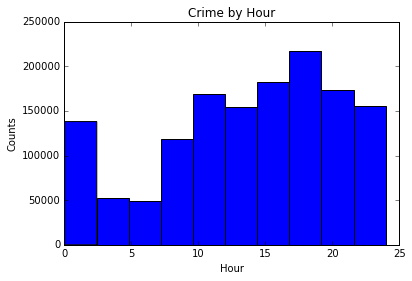

In [7]:
# Distribution of the times
plt.hist(times)
plt.title('Crime by Hour')
plt.xlabel('Hour')
plt.ylabel('Counts');

### Reading in the captured Tweets

In [8]:
tweets = []
rootdir = '/Users/LucasRamadan/DSCI6007-student/Final-Project/tweets/'

In [9]:
for subdir, dirs, files in os.walk(rootdir):
    # skip the .DS_store
    for f in files[1:]:
        with open(subdir+f, 'r') as t:
            data = json.load(t)
            tweet = data.replace('\n', '').replace('\r', '').replace('false', 'False').replace('true', 'True').replace('null', 'None')
            tweets.append(eval(tweet))

In [10]:
clean_data = []

In [11]:
for tweet in tweets:
    clean_data.append((tweet['created_at'], tweet['id'], tweet['text'], tweet['user']['name'], tweet['user']['location']))

In [12]:
twitter = pd.DataFrame(clean_data, columns=['Date', 'Tweet_ID', 'Content', 'Username', 'Location'])

In [13]:
twitter.head()

,Date,Tweet_ID,Content,Username,Location
0,Wed Mar 02 20:17:02 +0000 2016,705124779842383872,Klemzig: Police have arrested a 33y\/o man aft...,7 News Adelaide,"Adelaide, South Australia"
1,Wed Mar 02 20:17:03 +0000 2016,705124782358994945,Come to #MobileMakers Demo Day tomorrow 5\u201...,Steve Uffelman,"San Francisco, CA"
2,Wed Mar 02 20:17:03 +0000 2016,705124782522630145,RT @BeardedBearce: My mind is dangerous so don...,Candi,in a world of my own
3,Wed Mar 02 20:17:03 +0000 2016,705124783072092160,RT @WSJ: Indicted ex-CEO Aubrey McClendon foun...,CG,None
4,Wed Mar 02 20:17:03 +0000 2016,705124783114100737,RT @WritersofColour: .@1500ANDcounting is an u...,1500ANDcounting.,Very Much Outside the Box.


In [14]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4416 entries, 0 to 4415
Data columns (total 5 columns):
Date        4416 non-null object
Tweet_ID    4416 non-null int64
Content     4416 non-null object
Username    4416 non-null object
Location    2977 non-null object
dtypes: int64(1), object(4)
memory usage: 207.0+ KB


### Fix the Twitter DT

In [15]:
import calendar

In [16]:
month_abbr = {month: i for i, month in enumerate(calendar.month_abbr)}

In [17]:
def twitter_datetime(s):
    dow, month, day, time, _, year = s.split()
    hour, mins, sec = map(int, time.split(':'))
    return datetime.datetime(int(year), month_abbr[month], int(day),  hour, mins, sec, 0)

In [18]:
twitter['datetime'] = twitter['Date'].apply(twitter_datetime)
twitter.drop("Date", axis=1, inplace=True);

In [19]:
twitter.head()

,Tweet_ID,Content,Username,Location,datetime
0,705124779842383872,Klemzig: Police have arrested a 33y\/o man aft...,7 News Adelaide,"Adelaide, South Australia",2016-03-02 20:17:02
1,705124782358994945,Come to #MobileMakers Demo Day tomorrow 5\u201...,Steve Uffelman,"San Francisco, CA",2016-03-02 20:17:03
2,705124782522630145,RT @BeardedBearce: My mind is dangerous so don...,Candi,in a world of my own,2016-03-02 20:17:03
3,705124783072092160,RT @WSJ: Indicted ex-CEO Aubrey McClendon foun...,CG,None,2016-03-02 20:17:03
4,705124783114100737,RT @WritersofColour: .@1500ANDcounting is an u...,1500ANDcounting.,Very Much Outside the Box.,2016-03-02 20:17:03


### Need to only take Tweets from San Francisco

Possible Locations:
    - San Fran
    - San Francisco
    - San Francisco, CA

In [20]:
def in_sf(s):
    if s != None:
        if 'San Fran' in s:
            return 1
        else: 
            return 0
    else:
        return 0

In [21]:
twitter['In_SF'] = twitter['Location'].apply(in_sf)

In [22]:
twitter_sf = twitter.loc[twitter.In_SF==1]

In [23]:
twitter_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 4331
Data columns (total 6 columns):
Tweet_ID    42 non-null int64
Content     42 non-null object
Username    42 non-null object
Location    42 non-null object
datetime    42 non-null datetime64[ns]
In_SF       42 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.3+ KB


### Now fix the Police DT

In [24]:
def sfpd_datetime(t):
    hour, mins = map(int, t.split(':'))
    year, month, day = datetime.date.today().timetuple()[:3]
    return datetime.datetime(year, month, day, hour, mins)

In [25]:
police['datetime'] = police['Time'].apply(sfpd_datetime)
police.drop(['Date', 'Time'], axis=1, inplace=True)

In [26]:
police.head()

,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Location,PdId,datetime
0,160117098,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Monday,CENTRAL,"ARREST, BOOKED",PINE ST / MONTGOMERY ST,-122.402574,37.791898,"(37.7918981438883, -122.402573952339)",1.601171e+13,2016-03-02 23:55:00
1,160117098,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Monday,CENTRAL,"ARREST, BOOKED",PINE ST / MONTGOMERY ST,-122.402574,37.791898,"(37.7918981438883, -122.402573952339)",1.601171e+13,2016-03-02 23:55:00
2,160117010,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,MISSION,"ARREST, BOOKED",20TH ST / CHURCH ST,-122.428052,37.758090,"(37.7580899767786, -122.428051707644)",1.601170e+13,2016-03-02 23:50:00
3,160117060,ASSAULT,AGGRAVATED ASSAULT ON POLICE OFFICER WITH A KNIFE,Monday,BAYVIEW,"ARREST, BOOKED",1200 Block of 4TH ST,-122.391397,37.772351,"(37.7723509714232, -122.391397033631)",1.601171e+13,2016-03-02 23:50:00
4,160117060,OTHER OFFENSES,RESISTING ARREST,Monday,BAYVIEW,"ARREST, BOOKED",1200 Block of 4TH ST,-122.391397,37.772351,"(37.7723509714232, -122.391397033631)",1.601171e+13,2016-03-02 23:50:00


### Now we can compare the Date and Times and match

In [27]:
# example of taking difference of datetimes
tweet_ex = twitter_sf.ix[1092]['datetime']

In [28]:
print twitter_sf.ix[1092]["Content"]
print twitter_sf.ix[1092]['datetime']

RT @AP: BREAKING: Oklahoma police: Ex-Chesapeake CEO Aubrey McClendon has died in a car wreck after indictment.
2016-03-02 20:19:18


In [30]:
# only look at the 1000 most recent incidents

for i in xrange(1000):
    time_diff = police.ix[i]['datetime'] - tweet_ex
    # ie the tweet was within an hour of the crime
    if time_diff.seconds <= 3600:
        print police.ix[i]['IncidntNum']

160116761
160116761
160116705
166033838
160118632
166033509
160116664
160118369
160116595
160116614
160116620
160116620
160116620
160116589
160116608
160117139
166032476
166036531
160121691
166033991
166032539
160118121
160117678
160116636
160116686
160116686
160116545
160113529
160113450
160123722
166034892
160113369
160113400
160114210
166034438
160113466
160118353
166032244
166037523
160113701
160114179
160115321
160110995
160113193
160108031
160117189
166034381
166034604
160128982
160110967
160112264
160110569
166032341
160110860
160112929
166031434
160110519


### Make Tweet Generator and then match with a example police incident